# International Sports Events: Window Dressing and Repression

In this assignment I will partly replicate a study on the relationship between repression in autocratic regimes and international sports events:

* [Scharpf, A., Gläßel, C., Pearce, E. (2022) International Sports Events and Repression in Autocracies: Evidence from the 1978 FIFA World Cup, American Political Science Review, 1-18](https://doi:10.1017/S0003055422000958)

> Konstantina Zouni, Undergraduate <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> t8190046@aueb.gr

## Import Libraries

I will use several libraries in my analysis
* [statsmodels](https://www.statsmodels.org/stable/index.html) implements models for statistical estimation
* [plotly](https://plotly.com/python/) is used for the visualizations
* [stargazer](https://pypi.org/project/stargazer/) implements the summaries formatting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from matplotlib.lines import Line2D

## Q1: Overview

* Replicating **Tables SI.3.1** and **SI.3.2** of the Supporting Information to ensure that I have the correct data

* Replicating **Figure SI.1.1** from the supporting information and **Figure 1** from the main publication

Read the [main data file](https://dataverse.harvard.edu/file.xhtml?fileId=6358368&version=1.0) from the [replication package](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

In [2]:
main_data = pd.read_csv('data/main_data.tab', sep='\t')

### Table SI.3.1.: Summary statistics (Main analyses)

That table shows **summary statistics** for all variables used in the main analyses

Keep the columns that appear at the Table SI.3.1. 

In [3]:
table_1=main_data[['repression',
                     'lnrepression',
                     'dumrepression',
                     'hostcity',
                     'prox_hotelonly',
                     'prox_hotelpress',
                     'time',
                     'time2',
                     'time3',
                     'lnpop_1970',
                     'literacy_avg',
                     'vote_frejuli',
                     'lnrebact1974',
                     'lnrepression70_77',
                     'latitude',
                     'lnstrikes',
                     'lnlag_strikes',
                     'lnlag2_strikes',
                     'zone1',
                     'zone2',
                     'zone3',
                     'zone4',
                     'zone5']]

Remove rows where **time is null**
* We need to remove those rows because null time means that we don't have available repression data for that period

In [4]:
table_1=table_1[table_1['time'].notnull()]

Calculate variable descriptives

In [5]:
table_1=table_1.describe()

Keep certain descriptives that appear at the table

In [6]:
table_1=table_1.T
table_1=table_1[['count', 'mean', 'std', 'min', 'max']]

Keep only 3 decimals in the metrics and make count metric an integer

In [7]:
table_1=table_1.round(3)
table_1['count']=table_1['count'].astype(int)

Show result

In [8]:
table_1

,count,mean,std,min,max
repression,58107,0.005,0.104,0.000,7.000
lnrepression,58107,0.003,0.053,0.000,2.079
dumrepression,58107,0.003,0.058,0.000,1.000
hostcity,58383,0.010,0.100,0.000,1.000
prox_hotelonly,58107,7.000,1.613,0.000,9.398
prox_hotelpress,58107,7.079,1.629,0.000,9.398
time,58383,0.590,0.338,0.010,1.170
time2,58383,0.462,0.411,0.000,1.369
time3,58383,0.407,0.460,0.000,1.602
lnpop_1970,56628,9.701,1.336,6.057,14.905


### Table SI.3.2. Summary statistics (Post-World Cup period)

That table summarizes the variables used to analyze repression **during** and **after** the **1978 FIFA World Cup**

Keep the columns that appear at the Table SI.3.2. 

In [9]:
table_2=main_data[['repression',
                     'lnrepression',
                     'hostcity',
                     'postwc_time3mdum',
                     'time_postwc',
                     'time2_postwc',
                     'time3_postwc',
                     'lnpop_1970',
                     'vote_frejuli',
                     'literacy_avg',
                     'lnrebact1974',
                     'lnrepression70_77',
                     'zone1',
                     'zone2',
                     'zone3',
                     'zone4',
                     'zone5']]

Remove rows where the 3 months post world cup time dummy is not null
* We need to remove those rows because when that variable is null it means that we don't have repression data for that period after the world cup

In [10]:
table_2=table_2[table_2['postwc_time3mdum'].notnull()]

Calculate variable descriptives

In [11]:
table_2=table_2.describe()

Keep certain descriptives that appear at the table

In [12]:
table_2=table_2.T
table_2=table_2[['count', 'mean', 'std', 'min', 'max']]

Keep only 3 decimals in the metrics and make count metric an integer

In [13]:
table_2=table_2.round(3)
table_2['count']=table_2['count'].astype(int)

Show result

In [14]:
table_2

,count,mean,std,min,max
repression,58321,0.004,0.096,0.000,9.000
lnrepression,58321,0.002,0.047,0.000,2.303
hostcity,58383,0.010,0.100,0.000,1.000
postwc_time3mdum,58383,0.786,0.410,0.000,1.000
time_postwc,58383,0.590,0.338,0.010,1.170
time2_postwc,58383,0.462,0.411,0.000,1.369
time3_postwc,58383,0.407,0.460,0.000,1.602
lnpop_1970,56628,9.701,1.336,6.057,14.905
vote_frejuli,57447,58.752,11.539,28.500,94.300
literacy_avg,56628,0.717,0.110,0.316,0.901


### Figure 1. Autocratic Hosts of International Sports Events

The figure shows the five-year (1990–2024) shares of authoritarian states among all countries that have hosted the Summer and Winter Olympics, as well as the world championships in athletics, basketball, cricket, football, handball, ice hockey, rugby, table tennis, and volleyball

Read the [figure 1 data](https://dataverse.harvard.edu/file.xhtml?fileId=6358362&version=1.0) from the [replication package](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)
* **autochostperc** variable shows the percentage of autocrtic hosts through the years
* **postcwy** variable represents the year periods

In [15]:
figure1_data = pd.read_csv('data/figure_1_data.tab', sep='\t')
figure1_data

,postcwy,event_selec,autochost,autochostperc
0,1.0,25.0,2.0,8.000000
1,2.0,31.0,4.0,12.903226
2,3.0,25.0,5.0,20.000000
3,4.0,24.0,6.0,25.000000
4,5.0,30.0,6.0,20.000000
5,6.0,32.0,9.0,28.125000
6,7.0,27.0,10.0,37.037037


Create dictionary with the new labels for the year periods

In [16]:
years_dict={ '1': '1990–1994',
            '2': '1995–1999',
            '3': '2000–2004',
            '4': '2005–2009',
            '5': '2010–2014',
            '6': '2015–2019',
            '7': '2020–2024'
         }

Replace count postcwy values with years range labels

In [17]:
figure1_data['postcwy']=figure1_data['postcwy'].astype(int).astype(str).replace(years_dict)
figure1_data

,postcwy,event_selec,autochost,autochostperc
0,1990–1994,25.0,2.0,8.000000
1,1995–1999,31.0,4.0,12.903226
2,2000–2004,25.0,5.0,20.000000
3,2005–2009,24.0,6.0,25.000000
4,2010–2014,30.0,6.0,20.000000
5,2015–2019,32.0,9.0,28.125000
6,2020–2024,27.0,10.0,37.037037


Use matplot library to plot the figure
* **autochostperc** variable is used in the y axis
* **postcwy** variable is used in the x axis
* point markers where used to show the x axis timestamps in the line

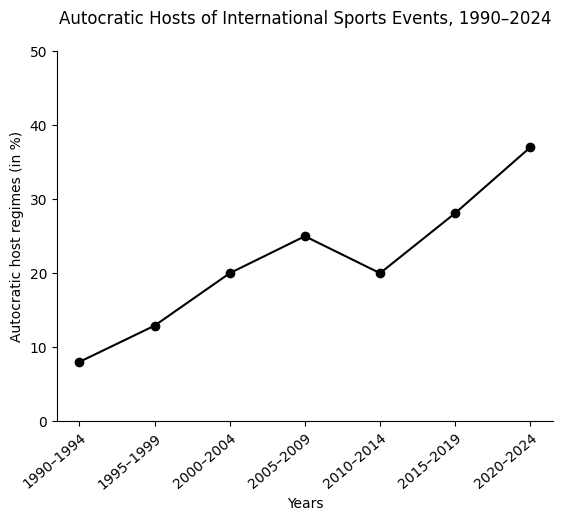

In [18]:
plt.plot(figure1_data['postcwy'], figure1_data['autochostperc'],marker='o', color='black')

plt.title('Autocratic Hosts of International Sports Events, 1990–2024', pad=20)
plt.xlabel('Years')
plt.ylabel('Autocratic host regimes (in %)')

#set y axis ticks
plt.yticks([0, 10, 20, 30, 40, 50])

#get axis and remove top and right spines
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#rotate x axis ticks
plt.xticks(rotation=40, ha='right', rotation_mode='anchor')

plt.savefig("figures/autocratic_hosts.png")

plt.show()

### Figure SI.1.1. Host regimes of international sports event

The figure shows all breaks down all democratic and autocratic host regimes of the most prominent international sports events since 1945
* **Black** and **grey** spikes indicate **autocratic** and **democratic** host regimes respectively

Read [figure SI.1.1. data](https://dataverse.harvard.edu/file.xhtml?fileId=6358357&version=1.0) from the [replication package](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)
* **baseline** has a different value for every sport event and indicates where the line for every event should be placed in the figure
* **democ** is a number **0.5 above** for every baseline or NaN. Being 0.5 above indicates that a democratic host existed in that year for that sport event and being NaN indicates the opposite
* **autoc** is a number **0.5 below** for every baseline or NaN. Being 0.5 below indicates that a autocratic host existed in that year for that sport event and being NaN indicates the opposite

In [19]:
figureSI11_data = pd.read_csv('data/figure_SI11_data.tab', sep='\t')
figureSI11_data.head()

,year,regime,baseline,democ,autoc
0,1987.0,0.0,2.5,3.0,NaN
1,1987.0,0.0,2.5,3.0,NaN
2,1991.0,0.0,2.5,3.0,NaN
3,1991.0,0.0,2.5,3.0,NaN
4,1995.0,1.0,2.5,NaN,2.0


List with all the unique baseline values

In [20]:
baselines=figureSI11_data['baseline'].unique()

List with the international sport events names

In [21]:
names=[ 'Rugby World Cup',
            'Winter Olympic Games',
            'Summer Olympic Games',
            'World Athletics Championships',
            'Ice Hockey World Championships',
            'FIFA World Cup',
            'Cricket World Cup',
            'World Handball Championship',
            'World Table Tennis Championships',
            'Basketball World Cup',
            'Volleyball World Championship'
      ]

Use [event plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.eventplot.html) from matplot to create the figure
* **Event plot** creates identical parallel lines at given positions
* With event plot we can generate the democratic and autocratic bars for every sport event
* Every **democratic bar** is ploted 0.5 above the baseline (lineoffsets) of the sport event and with **black color**
* Every **autocratic bar** is ploted 0.5 below the baseline (lineoffsets) of the sport event and with **grey color**
* Sport events baselines are plotted with a grey line

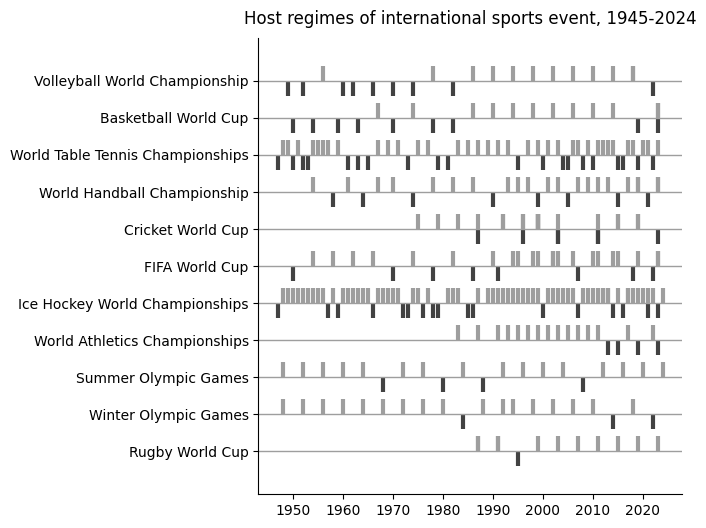

In [22]:
fig, axs = plt.subplots()

for g in baselines:
    #get baseline data
    baseline_data=figureSI11_data[figureSI11_data['baseline']==g]
    democ=baseline_data[baseline_data['democ']>g]
    autoc=baseline_data[baseline_data['autoc']<g]
    
    #plot the democratic bars 0.5 above baseline with lineoffset
    axs.eventplot(democ['year'],
                  lineoffsets= g + 0.5,
                  linelengths=1,
                  linewidths=3,
                  color = ['#9E9E9E'])
    
    #plot the autocratic bars 0.5 below baseline with lineoffset
    axs.eventplot(autoc['year'],
                  lineoffsets= g - 0.5,
                  linelengths=1,
                  linewidths=3,
                  color = ['#424242'])
    
    #plot baseline line
    plt.axhline(y = g, color = '#9E9E9E', linestyle = '-', linewidth=1)
    
#remove top and right spines
axs.spines['right'].set_color('none')
axs.spines['top'].set_color('none')

#set baseline y axis ticks
plt.yticks([2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5])

#set y axis tick labels
axs.set_yticklabels(names)

axs.set_title('Host regimes of international sports event, 1945-2024', pad=10)

plt.tight_layout()
fig.set_size_inches(7.5, 5.5, forward=True)

plt.savefig("figures/host_regimes_breakdown.png")

plt.show()

## Q2: Repression in Departments with and without Host Cities

Replication of **Table SI.4.1.** Linear regressions (OLS) for repression in departments with and without host cities

To examine the repression in departments with and without host cities the authors of the publication have developed the following hypothesis:
* **Hypothesis 1**: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities
* **Hypothesis 2**: During an international sports tournament, state repression drops in host cities but remains unchanged in other cities

They validate their hypotheses they use a series of regression analyses. They use negative binomial regression models, but they find that their findings are robust with **Ordinary Least Squares (OLS)** so I will focus on that regression analysis.

Regression model:

$$
y_i,_t = α + β1HostCityi ∗ Time_t + β2HostCity_i ∗ Time^2_t
+ β3HostCity_i + β4Time_t + β5Time^2_t+ γX_i + ϵ_i,_t,
$$

where y is number of **repression** events in department i at day t. α is the intercept,
the coefficients β1 and β2 capture repression dynamics in **host and non-host** cities. γt
is
a vector of coefficients for the time-invariant **control variables**. Unobserved determinants
of repression events are captured by the error term ϵi,t.

Depended variable explanation:
* In the **negative binomial** model they use the **repression** as the depended variable. In the **OLS** model we have a **log-linear model** and thus we will use the natural logarithm: **ln(repression)**
* The **repression** variable is **discrete** and thus it can take on only a specific set of values and because it is count it can take only positive values
* **OLS** is typically used to model relationships between **continuous** variables the model may not accurately reflect the underlying relationship between the variables
* To solve this issue we can use a **ln transformation** of the dependent variable
* Also the logarithmic transformation can help with **normalizing** the **skewed distribution** of the repression and thus improve the **accuracy** and **reliability** of the OLS results. 

Independed variables explanation:
* **HostCity x Time**: an **interaction variable** that is used to calculate the interaction coeffiient between the hostcity (1 for hosts and 0 for non hosts) and time. It helps to test **hypothesis 1** because it allows us to determine whether the effect of time on the outcome is different depending on the value of the hostcity.
* **Square of Time**: a **quadratic variable** accounts for the **inverted U** shaped relationship stated by hypotheses 1 and 2. It produces a curvature that can reverse the direction of the relationship of HostCity x Time. The relationship that the hypothesis state is not linear because as the time progresses the repression is not increasing proportionally. There is a turning point that after that the repression decreases. The quadratic variable allow us to capture that complex pattern.
* **HostCity x Square of Time**: an **interaction quadratic variable**. Is used to calculate the interaction coeffiient between the hostcity and square of time and helps test the **hypothesis 2** because it can capture the **sensitivity** of the repression as the value of time increases exponentially.
* **Control variables**: they might have an impact at the selection of host cities and the repression: literacy rate, population size, peronist vote, rebel activity, past repression

Read the [main_data file](https://dataverse.harvard.edu/file.xhtml?fileId=6358368&version=1.0) from the [replication package](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

In [23]:
main_data = pd.read_csv('data/main_data.tab', sep='\t')

### OLS Model 1

Run the first linear regression model **without** the **control** and **zone FE** variables
* **Heteroscedasticity** refers to the situation where the variance of the errors (residuals) in a regression model is not constant
* It can affect the **accuracy** of the **standard errors** and thus the statistical significance of the coefficients and the overall fit of the model
* To address this issue the authors use heteroscedasticity-robust standard errors
* I will use **hc1** for robust standard errors

In [24]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2']]
y = main_data['lnrepression']
x = sm.add_constant(x)

#fit linear regression model
model1 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           lnrepression   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.90
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.31e-13
Time:                        21:20:59   Log-Likelihood:                 89824.
No. Observations:               58107   AIC:                        -1.796e+05
Df Residuals:                   58101   BIC:                        -1.796e+05
Df Model:                           5                                         
Covariance Type:                  hc1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0026      0.001      4.027

### OLS Model 2

Run the first linear regression model **with** the **control** variables

In [25]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77']]
y = main_data['lnrepression']
x = sm.add_constant(x)

#fit linear regression model
model2 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           lnrepression   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     17.56
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.16e-32
Time:                        21:20:59   Log-Likelihood:                 86804.
No. Observations:               56394   AIC:                        -1.736e+05
Df Residuals:                   56383   BIC:                        -1.735e+05
Df Model:                          10                                         
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0041      0.00

### OLS Model 3

Run model 3 with the **control** and **zone FE** variables

In [26]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5']]
y = main_data['lnrepression']
x = sm.add_constant(x)

#fit linear regression model
model3 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.72e-31
Time:                        21:20:59   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0039      0.00

### Summarize models and interpret the results

Use stargazer to summarize the three models in the same table

In [27]:
stargazer = Stargazer([model1, model2, model3])

stargazer.title('Linear regressions (OLS) for repression in departments with and without host cities')

#change covarietes order
stargazer.covariate_order(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 
                          'lnpop_1970', 'literacy_avg', 'vote_frejuli', 'lnrebact1974',
                           'lnrepression70_77', 'const'])

stargazer.show_degrees_of_freedom(False)

#add controls and zone FE notes
stargazer.add_line('Controls', ['&#x2718', '&#x2714', '&#x2714'])
stargazer.add_line('Zone FE', ['&#x2718', '&#x2718', '&#x2714'])

#set significance levels
stargazer.significance_levels([0.001, 0.01, 0.05])

stargazer.add_custom_notes([' Values are coefficients with robust standard errors in parentheses'])

stargazer.show_residual_std_err= False

#show summary in html format
HTML(stargazer.render_html())

To interpret the results I will use the **coefficients** because they are related with the **hypothesis 1 & 2**

**hostcitytime**
* the variable is statistically **significant** for the 3 models because it has p<0.05 and thus as the hypothesis 1 indicates it has significant impact in the repression
* the coefficient compared to the hostcitytime2 it has a bigger value thus it has more impact
* it has a **positive** sign and thus as time prior to the world cup progress the repression is increasing in host cities

**hostcitytime2**
* the variable is statistically **significant** for the 3 models because it has p<0.05 and thus as the hypothesis 2 indicates it has significant impact in the repression
* the hostcity interacts with the variable time2 which is **quadratic** and the sign of the interaction variable is negative that results in the **inverted U shape**
* also the **negative** sign means that as time progress the repression events are decreasing exponentially in host cities

**hostcity, time, time2**
* the variables are statistically **unsignificant** because they have p>0.05 and that means that they don't have an impact in the repression

**control variables**
* some of the variables are statistically significant while others not
* for the variables that are statistical significant the coefficients are very small and that indicates that they have a **small impact** in repression
* when we add those variables to model 1 the coefficient of the hostcitytime and the hostcitytime2 is **not affected** and that means that they don't have a significant impact in the model in general

**In total**, the repression is mainly affected by the **hostcitytime** and the **hostcitytime2**. For the **host cities** in the beginning the repression is increasing because the hostcitytime has the bigger coefficient and a positive sign. As time progresses the hostcitytime2 that has a negative sign increases significantly because time2 increases exponentially. Although hostcitytime has a smaller coefficient due to the exponental time increase the total negative value becomes significant and as a result it decreases the repression. For the **non host** cities the hostcity takes the 0 value so hostcitytime and hostcitytime2 are zeroed out. Because the repression mainly depends on those variables it will remain unchanged.

**Note**: I will not interpret the **R square** and the **F statistic** because OLS is a linear regression model that captures the linear relationship between the dependent and the independent variables. In this case the hypothesis states that the relationship we are testing is **not linear** as I explained above. 

## Q3: Graphical Overview of Effects

Replication of the **figure 5** in the paper with the **OLS** model and **enrichment** with the actual repression data
* Figure 5 shows predicted numbers of daily repression events in departments with host cities and in other departments. Calculations are based on interaction effects of Model 3, Table 1, with control variables held at observed values
* I will replicate this figure using the effects of the Model 3 with the OLS method because as stated in the paper and as I proved in Q2 the effects of the negative binomial model are robust with the OLS model

Read the [main_data file](https://dataverse.harvard.edu/file.xhtml?fileId=6358368&version=1.0) from the [replication package](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

In [28]:
main_data = pd.read_csv('data/main_data.tab', sep='\t')

Run **OLS** regression model with the **control** and **zone FE** variables

In [29]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5']]
y = main_data['lnrepression']
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           lnrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.72e-31
Time:                        21:21:01   Log-Likelihood:                 86946.
No. Observations:               56394   AIC:                        -1.739e+05
Df Residuals:                   56379   BIC:                        -1.737e+05
Df Model:                          14                                         
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0039      0.00

Generate the repression prediction based on the model that I created

In [30]:
results = pd.DataFrame()
results['pre'] = model.predict(x)
results=results.dropna()

Because I want to plot the repression in the figure and not the ln(repression) that the model predicted I will **remove the ln** by raising e in the ln(repression) power

In [31]:
results=np.exp(results)

Retrieve the 95% confidence interval using the get prediction method from stats model

In [32]:
predictions = model.get_prediction(x)
ci=predictions.summary_frame(alpha=0.05)
ci=ci.dropna()

Remove ln from repression in the confidence interval values as well

In [33]:
ci=np.exp(ci)

Merge predictions with the main data

In [34]:
results = pd.merge(results, main_data, left_index=True, right_index=True)

Separate host and non host cities for the predictions and the confidence interval

In [35]:
host_1=results[results['hostcity']==1]
non_host_1=results[results['hostcity']==0]
host_95=pd.merge(ci, host_1, left_index=True, right_index=True)
non_host_95=pd.merge(ci, non_host_1, left_index=True, right_index=True)

Group by time and calculate the mean repression prediction and confidence interval

In [36]:
host=host_1.groupby(by='time').mean(numeric_only=True).reset_index()
non_host=non_host_1.groupby(by='time').mean(numeric_only=True).reset_index()
host_95=host_95.groupby(by='time').mean(numeric_only=True).reset_index()
non_host_95=non_host_95.groupby(by='time').mean(numeric_only=True).reset_index()

To enrich the figure I will also plot the moving average of the **actual repression** like the **figure 4** in the paper
* Select the rows where time is not null
* Group by time and calculate the **mean repression**. In the figure 4 they calculate the sum repression but I will calculate the mean for better interpretation because in the figure 5 the y axis has the mean predicted repression
* Then I calculate the **5 day moving average**

In [37]:
actual_host=main_data[main_data['hostcity']==1]
actual_host=actual_host[actual_host['time'].notnull()]
actual_host=actual_host[['time', 'repression']]
actual_host=actual_host.groupby(by='time').mean().reset_index()
actual_host['moving_avg'] = actual_host.iloc[:,1].rolling(window=5).mean()

The same procedure for the non host cities

In [38]:
actual_nonhost=main_data[main_data['hostcity']==0]
actual_nonhost=actual_nonhost[actual_nonhost['time'].notnull()]
actual_nonhost=actual_nonhost[['time', 'repression']]
actual_nonhost=actual_nonhost.groupby(by='time').mean().reset_index()
actual_nonhost['moving_avg'] = actual_nonhost.iloc[:,1].rolling(window=5).mean()

Create the world cup event window

In [39]:
event_window = pd.DataFrame()
event_window = results[results['time'] >= 0.93]

Create a list with the x axis timestamps

In [40]:
dates=['March 1',
       'April 1',
       'May 1',
       'June 1',
       'June 25'    
      ]

Plot the figure 5 with **matplot** library
* The plot consists of **two subplots**: one for the host and one for the non host cities
* Predicted repression is based on the ols model 3
* **Shading** around lines gives the **95% confidence intervals** of the model
* **World cup time window** shows when the event starts and ends
* The **light blue line** shows the **moving average** of the actual repression

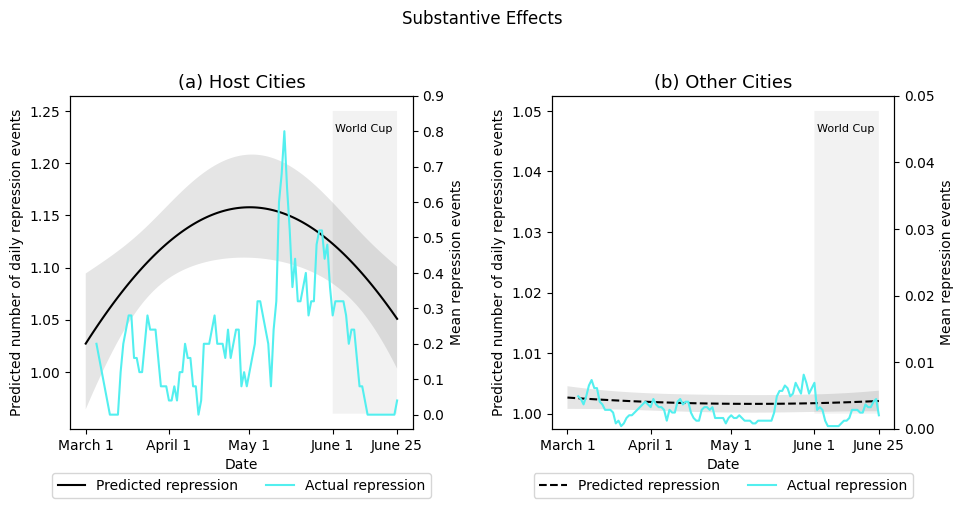

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

fig.suptitle('Substantive Effects')

#create secondary axis for the two subplots
ax2 = axes[0].twinx()
ax3 = axes[1].twinx()

#for the first subplot plot the prediction line, the 95% ci and the moving average
axes[0].plot(host['time'], host['pre'], color='black', lw=1.5)
ax2.plot(actual_host['time'], actual_host['moving_avg'], color='#53EFEF')
axes[0].fill_between(host['time'], (host_95['mean_ci_lower']), (host_95['mean_ci_upper']),
                     color='black', alpha=0.1, edgecolor='None')

#for the second subplot plot the prediction line, the 95% ci and the moving average
axes[1].plot(non_host['time'], non_host['pre'], color='black', lw=1.5, linestyle='dashed')
ax3.plot(actual_nonhost['time'], actual_nonhost['moving_avg'], color='#53EFEF')
axes[1].fill_between(non_host['time'], (non_host_95['mean_ci_lower']), (non_host_95['mean_ci_upper']),
                     color='black', alpha=0.1, edgecolor='None')

#plot the event windows with fill between
axes[0].fill_between(event_window['time'], 0.96, 1.25, color='black', alpha=0.05, edgecolor='None')
axes[1].fill_between(event_window['time'], 1.0, 1.05, color='black', alpha=0.05, edgecolor='None')
#add the title of the event on the top of the event window
axes[0].text(0.94, 1.23,'World Cup',fontsize=8)
axes[1].text(0.94, 1.0465,'World Cup',fontsize=8)

#set axis ranges and labels for the subplots
plt.setp(axes[0], xticks=[0.01, 0.32, 0.62, 0.93, 1.17],
         xticklabels=dates,
         yticks=[1.0, 1.05, 1.10, 1.15,1.20, 1.25])
plt.setp(axes[1], xticks=[0.01, 0.32, 0.62, 0.93, 1.17],
         xticklabels=dates,
         yticks=[1.0, 1.01, 1.02, 1.03,1.04,1.05])

#set y axis ranges for the second axis
plt.setp(ax2,
         yticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.setp(ax3,
         yticks=[0.0, 0.01, 0.02, 0.03, 0.04, 0.05])

axes[0].set_title('(a) Host Cities', fontsize=13)
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Predicted number of daily repression events")

axes[1].set_title('(b) Other Cities', fontsize=13)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Predicted number of daily repression events")

ax2.set_ylabel("Mean repression events")
ax3.set_ylabel("Mean repression events")

fig.tight_layout(pad=2.0)

#create line types for legend
line_solid = Line2D([0,1],[0,1],linestyle='solid', color='black')
line_dashed = Line2D([0,1],[0,1],linestyle='dashed', color='black')
line_blue = Line2D([0,1],[0,1],linestyle='solid', color='#53EFEF')

#create legends for the subplots
axes[0].legend(handles=[line_solid, line_blue], labels=['Predicted repression', 'Actual repression'], ncol=2,
          loc='center', bbox_to_anchor=(0.5, -0.17))
axes[1].legend(handles=[line_dashed, line_blue], labels=['Predicted repression', 'Actual repression'], ncol=2,
          loc='center', bbox_to_anchor=(0.5, -0.17))

plt.savefig("figures/substantive_effects_enriched.png")

plt.show()

### Results Interpretation

**Predicted Repression**
* as we can see the shape of the repression line is an **inverted U** like the figure 5 and that means that indeed the results of the negative binomial regression are **robust** with the OLS model
* the hypothesis are proved because in host cities the repression increases before the event and it drops when the event starts, in the non host cities the regression remains unchanged
* we can see that the **range** in the **y axis** is **different** compared to the paper's figure
* in paper's figure 5 the authors use the repression in the prediction model
* in the OLS model that I created I used the ln(repression) and before plotting the results I removed the ln
* if we take a look at the actual data we can see that the repression is **not accurately** converted into the lnrepression. For example repression=2 corresponds to lnrepression=1.098612 when it should be 0.693147.
* that can be explained by a **binning process** that the authors might have applied to the data
* also the fugire 5 in the paper has a bigger confidence interval because of the overdispersion of the count repression data

**Actual Repression**
* it is indicated by the 5 days moving average line
* the actual repression seems to follow the hypothesis as it has the same behavior with the predicted repression
* in the **host** cities the repression is increasing **by 0.1** before the event and when the event starts it decreases by 0.1
* in the **non host** cities the repression is increasing and decreasing many times but with a minor change in other words it has a very **small range** from 0.0 to 0.01 so we can say that it remains stable

## Verification of Q3 Results

I will try to replicate the Table 1 and the Figure 5 from the paper with the **negative binomial** model in order to **verify** the **methodology** that I am using in Q3 for generating the prediction line and the confidence interval
* instead of using the OLS model I will use the negative binomial
* the rest of the steps will be the same with Q3

In [42]:
main_data = pd.read_csv('data/main_data.tab', sep='\t')

* I will create the model using the [GLM (Generalized Linear Models)](https://www.statsmodels.org/stable/glm.html) from statsmodel
* **GLM** is a regression model that can be used to fit a variety of different types of regression models
* It allows the response variable to follow a **distribution** other than the normal distribution
* I will use the **families.NegativeBinomial** that will crate an instance of the negative binomial family of probability distributions
* Negative binomial is is better than linear models when the data is **discrete** (or count)

In [43]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5']]
y = main_data['repression']
x = sm.add_constant(x)

#fit linear regression model
model = sm.GLM(y, x, missing='drop', family=sm.families.NegativeBinomial()).fit(cov_type="hc1")

#view model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             repression   No. Observations:                56394
Model:                            GLM   Df Residuals:                    56379
Model Family:        NegativeBinomial   Df Model:                           14
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1043.3
Date:                Mon, 19 Dec 2022   Deviance:                       1461.7
Time:                        21:21:03   Pearson chi2:                 1.05e+05
No. Iterations:                     9   Pseudo R-squ. (CS):            0.02750
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.8316      3.63

As we can see the **coefficients** are not the same as the **table 1** in the paper but they are **close** so I can use them to create an approach of the figure 5

In [44]:
results = pd.DataFrame()
results['pre'] = model.predict(x)
results=results.dropna()

In [45]:
predictions = model.get_prediction(x)
ci=predictions.summary_frame(alpha=0.05)
ci=ci.dropna()

In [46]:
results = pd.merge(results, main_data, left_index=True, right_index=True)

In [47]:
host_1=results[results['hostcity']==1]
non_host_1=results[results['hostcity']==0]
host_95=pd.merge(ci, host_1, left_index=True, right_index=True)
non_host_95=pd.merge(ci, non_host_1, left_index=True, right_index=True)

In [48]:
host=host_1.groupby(by='time').mean(numeric_only=True).reset_index()
non_host=non_host_1.groupby(by='time').mean(numeric_only=True).reset_index()
host_95=host_95.groupby(by='time').mean(numeric_only=True).reset_index()
non_host_95=non_host_95.groupby(by='time').mean(numeric_only=True).reset_index()

In [49]:
dates=['March 1',
       'April 1',
       'May 1',
       'June 1',
       'June 25'    
      ]

Now I will plot the figure

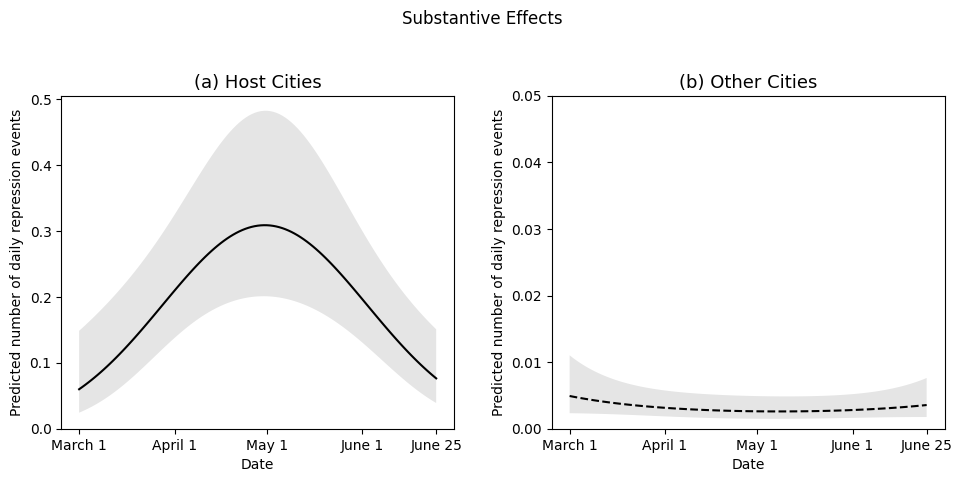

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

fig.suptitle('Substantive Effects')

#for the first subplot plot the prediction line, the 95% ci and the moving average
axes[0].plot(host['time'], host['pre'], color='black', lw=1.5)
axes[0].fill_between(host['time'], (host_95['mean_ci_lower']), (host_95['mean_ci_upper']),
                     color='black', alpha=0.1, edgecolor='None')

#for the second subplot plot the prediction line, the 95% ci and the moving average
axes[1].plot(non_host['time'], non_host['pre'], color='black', lw=1.5, linestyle='dashed')
axes[1].fill_between(non_host['time'], (non_host_95['mean_ci_lower']), (non_host_95['mean_ci_upper']),
                     color='black', alpha=0.1, edgecolor='None')

#set axis ranges and labels for the subplots
plt.setp(axes[0], xticks=[0.01, 0.32, 0.62, 0.93, 1.17],
         xticklabels=dates,
         yticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.setp(axes[1], xticks=[0.01, 0.32, 0.62, 0.93, 1.17],
         xticklabels=dates,
         yticks=[0.0, 0.01, 0.02, 0.03, 0.04, 0.05])

axes[0].set_title('(a) Host Cities', fontsize=13)
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Predicted number of daily repression events")

axes[1].set_title('(b) Other Cities', fontsize=13)
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Predicted number of daily repression events")

fig.tight_layout(pad=2.0)

plt.show()

As we can see the figures that the GLM model produced are very **similar** to the ones in the **figure 5** of the paper. Thus the **methodoly** that I used to create the prediction line and the confidence interval in Q3 is **correct**.

## Q4: Robustness Check Using a Dichotomous Indicator of Repression

Replication of the **Table SI.4.5** of the Supporting Information

To check whether the results are robust to potential reporting biases in our dependent variable the authors run logistic regressions using a binary outcome variable for regression
* They dichotomize the count dependent variable of repression by re-coding all positive count values to 1, and 0 otherwise
* Then they fit logistic regressions and linear probability models (OLS)

Read the [main_data file](https://dataverse.harvard.edu/file.xhtml?fileId=6358368&version=1.0) from the [replication package](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

In [51]:
main_data = pd.read_csv('data/main_data.tab', sep='\t')

### Logit Model 1

Run the logit model without the **controls** and **zone FE** variables
* We use **logistic regression** to predict the probability of the **categorical** dependent variable **dumrepression** based on the other independent variables
* **dumrepression** has value **1** for all positive count repression events and value **0** for zero events

In [52]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2']]
y = main_data['dumrepression']
x = sm.add_constant(x)

#fit linear regression model
model1 = sm.Logit(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.019190
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          dumrepression   No. Observations:                58107
Model:                          Logit   Df Residuals:                    58101
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.1533
Time:                        21:21:05   Log-Likelihood:                -1115.1
converged:                       True   LL-Null:                       -1317.0
Covariance Type:                  hc1   LLR p-value:                 4.467e-85
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.8507      0.267    -21.934      0.000      -6.373      -5.328
hostcitytime      4

Save the Pseudo R-square to use it in the results summary

In [53]:
model1_pseudo_r=float(model1.summary2().tables[0][3][0])
model1_pseudo_r=round(model1_pseudo_r, 2)
model1_pseudo_r

0.15

Calculate the Wald test statistic value
* The **Wald test (Wald Chi-Squared Test)** is a way to find out if explanatory variables in a model are **significant** and it can be used for binary variables
* The test allows us to determine whether we need to **exclude** variables from the model
* The p value is smaller than 0.05 and that means that the coefficients of the explanatory variables from logistic model are significantly different from zero and we should **keep** them in the model

In [54]:
A = np.identity(len(model1.params))
A = A[1:,:]
wald1=model1.wald_test(A, scalar= False)
print(wald1)

<Wald test (chi2): statistic=[[712.20480345]], p-value=1.12783656422425e-151, df_denom=5>


### Logit Model 2

Run the **logit** model with the **controls** variables

In [55]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77']]
y = main_data['dumrepression']
x = sm.add_constant(x)

#fit linear regression model
model2 = sm.Logit(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.013826
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56383
Method:                           MLE   Df Model:                           10
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.4027
Time:                        21:21:05   Log-Likelihood:                -779.73
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  hc1   LLR p-value:                1.601e-219
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -17.2479      3.181     -5.422      0.000     -23.482     -11.013
hostcit

In [56]:
model2_pseudo_r=float(model2.summary2().tables[0][3][0])
model2_pseudo_r=round(model2_pseudo_r, 2)
model2_pseudo_r

0.4

In [57]:
A = np.identity(len(model2.params))
A = A[1:,:]
wald2=model2.wald_test(A, scalar= False)
print(wald2)

<Wald test (chi2): statistic=[[637.2237871]], p-value=1.848923162096679e-130, df_denom=10>


### Logit Model 3

Run the **logit** model with the **controls** and **zone FE** variables

In [58]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5']]
y = main_data['dumrepression']
x = sm.add_constant(x)

#fit linear regression model
model3 = sm.Logit(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.013570
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          dumrepression   No. Observations:                56394
Model:                          Logit   Df Residuals:                    56379
Method:                           MLE   Df Model:                           14
Date:                Mon, 19 Dec 2022   Pseudo R-squ.:                  0.4138
Time:                        21:21:06   Log-Likelihood:                -765.25
converged:                       True   LL-Null:                       -1305.4
Covariance Type:                  hc1   LLR p-value:                9.017e-222
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.4018      3.161     -4.873      0.000     -21.597      -9.207
hostcit

In [59]:
model3_pseudo_r=float(model3.summary2().tables[0][3][0])
model3_pseudo_r=round(model3_pseudo_r, 2)
model3_pseudo_r

0.41

In [60]:
A = np.identity(len(model3.params))
A = A[1:,:]
wald3=model3.wald_test(A, scalar= False)
print(wald3)

<Wald test (chi2): statistic=[[791.3102331]], p-value=7.986448507621398e-160, df_denom=14>


### OLS Model 4

Run the first linear regression model **without** the **control** and **zone FE** variables

In [61]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2']]
y = main_data['dumrepression']
x = sm.add_constant(x)

#fit linear regression model
model4 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          dumrepression   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     15.66
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.95e-15
Time:                        21:21:06   Log-Likelihood:                 84143.
No. Observations:               58107   AIC:                        -1.683e+05
Df Residuals:                   58101   BIC:                        -1.682e+05
Df Model:                           5                                         
Covariance Type:                  hc1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0028      0.001      4.137

### OLS Model 5

Run the first linear regression model **with** the **control** variables

In [62]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77']]
y = main_data['dumrepression']
x = sm.add_constant(x)

#fit linear regression model
model5 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:          dumrepression   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     19.78
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           5.57e-37
Time:                        21:21:06   Log-Likelihood:                 81421.
No. Observations:               56394   AIC:                        -1.628e+05
Df Residuals:                   56383   BIC:                        -1.627e+05
Df Model:                          10                                         
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0053      0.00

### OLS Model 6

Run model 3 with the **control** and **zone FE** variables

In [63]:
x = main_data[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5']]
y = main_data['dumrepression']
x = sm.add_constant(x)

#fit linear regression model
model6 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:          dumrepression   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     14.45
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.15e-35
Time:                        21:21:06   Log-Likelihood:                 81565.
No. Observations:               56394   AIC:                        -1.631e+05
Df Residuals:                   56379   BIC:                        -1.630e+05
Df Model:                          14                                         
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0050      0.00

### Summarize models and interpret the results

Use **stargazer** to summarize the six models in the same table

In [64]:
stargazer = Stargazer([model1, model2, model3, model4, model5, model6])

stargazer.title('Regression results for binary variable of repression')

#change covariates order
stargazer.covariate_order(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'const'])

stargazer.show_degrees_of_freedom(False)

#add control and zone FE variable notes
stargazer.add_line('Controls', ['&#x2718', '&#x2714', '&#x2714', '&#x2718', '&#x2714', '&#x2714'])
stargazer.add_line('Zone FE', ['&#x2718', '&#x2718', '&#x2714', '&#x2718', '&#x2718', '&#x2714'])

#add walt test row
stargazer.add_line('Wald $χ^2$', [wald1.statistic[0][0].round(2), wald2.statistic[0][0].round(2),
                                  wald3.statistic[0][0].round(2), '', '', ''], location='ft')
#add pseudo r square row
stargazer.add_line('Pseudo $R^2$', [model1_pseudo_r, model2_pseudo_r, model3_pseudo_r, '', '', ''], location='ft')

#set significance levels
stargazer.significance_levels([0.001, 0.01, 0.05])

stargazer.add_custom_notes(['Values are coefficients with robust standard errors in parentheses'])

stargazer.show_residual_std_err= False
stargazer.show_adj_r2= False

stargazer.custom_columns(['Logit','OLS'], [3,3])

#show summary in html format
HTML(stargazer.render_html())

* As we can see in the **logit model** the coefficient of the **hostcitytime** is statistically **significant** and **positive** and the coefficient of the **hostcitytime2** is statistically **significant** and **negative** thus the hypothesis 1 & 2 is supported
* We can see that the results are **not sensitive** to the choice of the repression **indicator** 
* Thus we can conclude that the results are **robust** to potential **reporting bias** (for example exaggeration of the repression events)
* The **OLS** models results where explained in the **Q2**

## Q5: Robustness Check Using Matched Samples

Replication of **columns 1-3 of table SI.4.7** of the Supporting Information and recreation of **Figure 6** of the paper using **OLS** model
* Another robustness check that the authors have undertaken is to run regression analyses on **matched samples**. They have created subsets of the data that pair similar departments with and without host cities. The matching has been carried out both **manually**, by using the **range** of **population size**, and algorithmically with coarsened exact matching.
* I will replicate only the manual matching analysis
* The results of the **OLS model 3** with manual matching will be used to replicate **figure 6** that shows the predicted numbers of daily repression events in departments with host cities and in other departments

Read the [main_data file](https://dataverse.harvard.edu/file.xhtml?fileId=6358368&version=1.0) from the [replication package](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/RJY34I)

In [65]:
main_data = pd.read_csv('data/main_data.tab', sep='\t')

Keep the matched simple data for this analysis

In [66]:
matched_simple=main_data[main_data['matched_simple']==1]

### OLS Model 1 Matched

Run the first linear regression model **without** the **control** and **zone FE** variables for the matched data

In [67]:
x = matched_simple[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2']]
y = matched_simple['lnrepression']
x = sm.add_constant(x)

#fit linear regression model
model1 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           lnrepression   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     8.554
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           4.53e-08
Time:                        21:21:07   Log-Likelihood:                 1250.8
No. Observations:                4095   AIC:                            -2490.
Df Residuals:                    4089   BIC:                            -2452.
Df Model:                           5                                         
Covariance Type:                  hc1                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0292      0.008      3.446

### OLS Model 2 Matched

Run the first linear regression model **with** the **control** variables on matched data

In [68]:
x = matched_simple[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77']]
y = matched_simple['lnrepression']
x = sm.add_constant(x)

#fit linear regression model
model2 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           lnrepression   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     12.90
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           1.82e-22
Time:                        21:21:07   Log-Likelihood:                 1394.7
No. Observations:                4095   AIC:                            -2767.
Df Residuals:                    4084   BIC:                            -2698.
Df Model:                          10                                         
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9371      0.14

### OLS Model 3 Matched

Run model 3 with the **control** and **zone FE** variables for matched data

In [69]:
x = matched_simple[['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970',
          'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5']]
y = matched_simple['lnrepression']
x = sm.add_constant(x)

#fit linear regression model
model3 = sm.OLS(y, x, missing='drop').fit(cov_type="hc1")

#view model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           lnrepression   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     10.48
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           9.72e-24
Time:                        21:21:07   Log-Likelihood:                 1444.5
No. Observations:                4095   AIC:                            -2859.
Df Residuals:                    4080   BIC:                            -2764.
Df Model:                          14                                         
Covariance Type:                  hc1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9783      0.17

### Summarize models and interpret the results

Use stargazer to summarize the three models in the same table

In [70]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

stargazer = Stargazer([model1, model2, model3])

stargazer.title(' Linear regressions (OLS) for matched samples')

#change covarietes order
stargazer.covariate_order(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'const'])

stargazer.show_degrees_of_freedom(False)

#add controls and zone FE notes
stargazer.add_line('Controls', ['&#x2718', '&#x2714', '&#x2714'])
stargazer.add_line('Zone FE', ['&#x2718', '&#x2718', '&#x2714'])

#set significance levels
stargazer.significance_levels([0.001, 0.01, 0.05])

stargazer.add_custom_notes(['Values are coefficients with robust standard errors in parentheses'])

stargazer.show_residual_std_err= False
stargazer.show_adj_r2= False

stargazer.custom_columns(['Manual matching'], [3])

#show summary in html format
HTML(stargazer.render_html())

### Summaries Interpretation

* Just **like Q2** we can see that hostcitytime is statistically significant and has positive sign 
* Also hostcitytime2 is statistically significant and has negative sign
* The authors used **matched samples** in regression in order to select sample of observations that are similar in certain characteristics like the **population range** of the department
* They matched the departments with host cities with the departments with non host cities based on the population range (min-max)
* In that way they can **exclude** the **non host** cities that belong to a department that is **sparsely populated** or have a small ammount of non host cities
* The hypothesis are supported and the negative binomial results are found **robust** with the simple matched OLS regression
* Thus the support of the hypothesis is **not driven** by non host cities that belong to small departments
* In general the results remain the same to various **sample compositions** and unlikely to be driven by covariate imbalances or **model dependencies**

Generate the repression prediction based on the model that I created

In [71]:
results = pd.DataFrame()
results['pre'] = model3.predict(x)
results=results.dropna()

Because I want to plot the repression in the figure and not the ln(repression) that the model predicted I will remove the ln by raising e in the ln(repression) power

In [72]:
results=np.exp(results)

Retrieve the 95% confidence interval using the get prediction method from stats model

In [73]:
predictions = model3.get_prediction(x)
ci=predictions.summary_frame(alpha=0.05)
ci=ci.dropna()

Remove ln from repression in the confidence interval values as well

In [74]:
ci=np.exp(ci)

Merge predictions with the main data
* the merge will be done by index 
* because the prediction includes only the simple matched data after merging with the main data we will have only the simple matched data

In [75]:
results = pd.merge(results, main_data, left_index=True, right_index=True)

Separate host and non host cities for the predictions and the confidence interval

In [76]:
host_1=results[results['hostcity']==1]
non_host_1=results[results['hostcity']==0]
host_95=pd.merge(ci, host_1, left_index=True, right_index=True)
non_host_95=pd.merge(ci, non_host_1, left_index=True, right_index=True)

Group by time and calculate the mean repression prediction and confidence interval

In [77]:
host=host_1.groupby(by='time').mean(numeric_only=True).reset_index()
non_host=non_host_1.groupby(by='time').mean(numeric_only=True).reset_index()
host_95=host_95.groupby(by='time').mean(numeric_only=True).reset_index()
non_host_95=non_host_95.groupby(by='time').mean(numeric_only=True).reset_index()

Create the world cup event window

In [78]:
event_window = pd.DataFrame()
event_window = results[results['time'] >= 0.93]

Create a list with the x axis timestamps

In [79]:
dates=['March 1',
       'April 1',
       'May 1',
       'June 1',
       'June 25'    
      ]

Plot the figure 6 with **matplot** library
* The plot consists of **two lines**: one **solid** for the **host** and one **dashed** for the **non host** cities
* Predicted repression is based on the ols model 3 for matched data
* Shading around lines gives the 95% confidence intervals of the model
* World cup time window shows when the event starts and ends

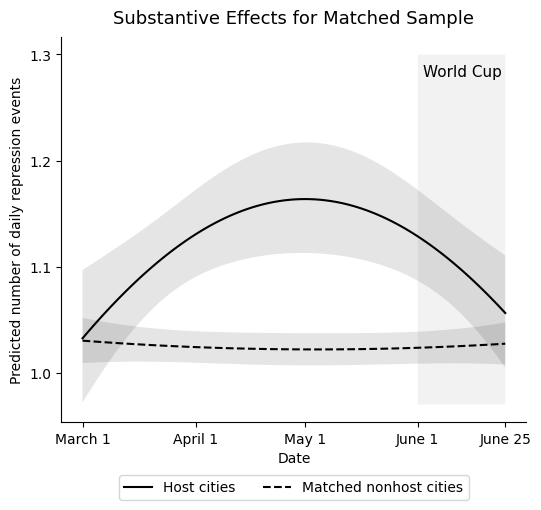

In [80]:
#plot predicted regression line for hosts and the corresponding confidence interval 
plt.plot(host['time'], host['pre'], color='black', lw=1.5)
plt.fill_between(host['time'], (host_95['mean_ci_lower']), (host_95['mean_ci_upper']),
                 color='black', alpha=0.1, edgecolor='None')

#plot predicted regression line for non hosts and the corresponding confidence interval 
plt.plot(non_host['time'], non_host['pre'], color='black', lw=1.5, linestyle='dashed')
plt.fill_between(non_host['time'], (non_host_95['mean_ci_lower']), (non_host_95['mean_ci_upper']),
                 color='black', alpha=0.1, edgecolor='None')

#create event window with fill between
plt.fill_between(event_window['time'], 0.97, 1.3, color='black', alpha=0.05, edgecolor='None')
plt.text(0.945, 1.28,'World Cup',fontsize=11)

#set x,y axis ranges and labels
plt.yticks([1.0, 1.10, 1.20, 1.30])
plt.xticks([0.01, 0.32, 0.62, 0.93, 1.17])
ax = plt.gca()
ax.set_xticklabels(dates)

#remove spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.title('Substantive Effects for Matched Sample', fontsize=13, pad=10)
plt.xlabel("Date")
plt.ylabel("Predicted number of daily repression events")

#create the line types for the legend
line_solid = Line2D([0,1],[0,1],linestyle='solid', color='black')
line_dashed = Line2D([0,1],[0,1],linestyle='dashed', color='black')

#create the legend
ax.legend(handles=[line_solid, line_dashed], labels=['Host cities', 'Matched nonhost cities'], ncol=2,
          loc='center', bbox_to_anchor=(0.5, -0.17))

#set the size
fig = plt.gcf()
fig.set_size_inches(6, 5)

plt.savefig("figures/substantive_effects_matched.png")

plt.show()

### Figure Interpretation

* As I explained in the summaries interpretation the figure shows the same pattern: for the host cities the repression increases before the world cap and decreases when the event begins
* For the non host cities the repression does not change significantly
* We can see that the **mean repression events** for the non host cities are **more** (range: 1.0-1.1) compared to the figure 5 that I replicated in Q3 (range: 1.0-1.01) and that can be explained due to the exclusion of the small departments with non host cities that might have less repression events
* The figure has a very **similar shape** like the figure 6 in the paper but the predicted repression range is different due to the different model that I used and the lnrepression that I explained in the Q3